In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import textwrap

import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x600 with 0 Axes>

In [21]:
def get_df():
    #df = pd.read_parquet("outputs/hotspots_per_fips_rolling_wc.parquet")
    #return gpd.read_file("outputs/d2-events-2d-230929_SVI_shapefile.geojson")
    return pd.read_parquet("outputs/d2-events-2d5-230929.parquet")
    #return df.reset_index()

In [22]:
def merge_shapefile(df):
    df = df.reset_index()
    df["year"] = df["time"].dt.year
    gdf = gpd.read_file("data/WesternUSCensusTract/CensusTract2020_WesternUS.shp")
    temp = gdf.merge(df, left_on="FIPS", right_on="GEOID")
    return temp

In [23]:
df = get_df()

In [24]:
df = df.reset_index()

In [25]:
df['_hws5'] = df[['heatday','wfday','smoke_pm_gt_five']].any(axis=1)

In [26]:
df = df.groupby("GEOID").resample("Y", on="time").sum()

In [27]:
df = df.drop(columns="GEOID")

In [28]:
df = merge_shapefile(df)

In [29]:
hsdict = {
    "wfday": {
        "title": "wildfire",
        "title_map": "Total days of wildfire burn zones",
    },
    "heatday": {
        "title": "heat",
        "title_map": "Total days of extreme heat",
    },
    # "coldday": {
    #     "title": "cold",
    #     "title_map": "Total cold days (under 5th percentile over last 5 years)",
    # },
    # "polluted": {
    #     "title": "pollution",
    #     "title_map": "Total days of high air pollution (over 35 μg/m\u00b3)",
    # },
    "smoke_pm_non_zero": {
        "title": "smoke_pm_non_zero",
        "title_map": r"Total days of wildfire smoke",
    },
    "smoke_pm_gt_five": {
        "title": "smoke_pm_gt_five",
        "title_map": r"Total days of wildfire smoke (over 5$\mu g/m^3$)",
    },
    # "hwp": {
    #     "title": "heat_wildfire_pollution",
    #     "title_map": "Total days of heat, wildfire and pollution concurrence",
    # },
    "hws": {
        "title": "heat_wildfire_smoke_pollution_non_zero",
        "title_map": r"Total days of extreme heat, wildfire burn zone and wildfire smoke co-occurrence",
    },
    # "hp": {
    #     "title": "heat_pollution",
    #     "title_map": "Total days of heat and pollution concurrence",
    # },
    "hs": {
        "title": "heat_smoke_pollution_non_zero",
        "title_map": r"Total days of extreme heat and wildfire smoke co-occurrence",
    },
    "hw": {
        "title": "heat_wildfire",
        "title_map": "Total days of extreme heat and wildfire burn zones co-occurrence",
    },
    "ws": {
        "title": "wildfire_smoke_pollution_non_zero",
        "title_map": r"Total days of wildfire burn zones & wildfire smoke co-occurrence",
    },
    "_hws": {
        "title": "heat_wildfire_pollution",
        "title_map": r"Total days of extreme heat or wildfire burn zone or wildfire smoke",
    },
    "_hws5":{
        "title": "heat_wildfire_smoke_pollution_over_five",
        "title_map": r"Total days of extreme heat, wildfire burn zone or wildfire smoke (over 5$\mu g/m^3$)",
    },
    "hs5": {
        "title": "heat_smoke_pollution_over_five",
        "title_map": r"Total days of extreme heat and wildfire smoke (over 5$\mu g/m^3$) co-occurrence",
    },
    "hws5": {
        "title": "heat_wildfire & smoke_pollution_over_five",
        "title_map": r"Total days of extreme heat, wildfire burn zone and wildfire smoke (over 5$\mu g/m^3$) co-occurrence",
    },
    "ws5": {
        "title": "wildfire_smoke_pollution_over_five",
        "title_map": r"Total days of wildfire burn zone and wildfire smoke (over 5$\mu g/m^3$) co-occurrence",
    },
}

In [30]:
df.columns

Index(['STATE_ABBR', 'STATE_FIPS', 'COUNTY_FIP', 'STCOFIPS', 'TRACT_FIPS',
       'FIPS', 'POPULATION', 'POP_SQMI', 'SQMI', 'Shape_Leng', 'Shape_Area',
       'geometry', 'GEOID', 'time', 'wfday', 'heatday', 'smoke_pm_non_zero',
       'smoke_pm_gt_five', 'hw', '_hws', 'hs', 'hws', 'ws', 'hs5', 'hws5',
       'ws5', 'heatday_2d', 'smoke_pm_non_zero_2d', 'wfday_2d', '_hws_2d',
       'hs_2d', 'hws_2d', 'ws_2d', 'hw_2d', 'smoke_pm_gt_five_2d', 'hs_2d_5',
       'ws_2d_5', 'hws_2d_5', '_hws5', 'year'],
      dtype='object')

In [31]:
df["hs"].mean()

2.1105294160960164

In [32]:
df.groupby("year")["hs"].mean()

year
2006    0.668931
2007    1.144080
2008    1.561520
2009    1.108792
2010    0.518831
2011    0.754915
2012    2.413298
2013    2.824553
2014    1.126684
2015    1.704219
2016    2.246300
2017    5.129666
2018    3.657720
2019    0.667771
2020    6.130660
Name: hs, dtype: float64

In [16]:
temp = gpd.read_file("outputs/d2-events-2d-230929_SVI_shapefile.geojson")

In [17]:
temp = temp[["FIPS","geometry"]]

In [18]:
df = df.drop(columns="geometry")

In [19]:
df_main = df.merge(temp, on='FIPS', how='left')

In [20]:
df_main = gpd.GeoDataFrame(
    df_main, geometry=df_main["geometry"])

In [24]:
df_main.to_file("outputs/d2-grid-2d-231004_shapefile.geojson", driver='GeoJSON')

# Grid Plots

In [33]:
df_main= gpd.read_file("outputs/d2-grid-2d-231004_shapefile.geojson")

In [34]:
keys = list(hsdict.keys())

In [35]:
gdf = gpd.read_file('data/usastate/tl_2020_us_state.shp')
gdf = gdf[gdf['STUSPS'].isin(['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA','WY'])]

In [36]:
yrs = df_main["year"].unique()

In [24]:
plt.rcParams["font.family"] = "Times New Roman"

In [45]:
import matplotlib.gridspec as gridspec
from config import *
cmap = "magma_r"

In [50]:
def plot_maps(exposure, ax):
    plt.clf()  # clear figure
    # Creating a common colorbar
    vmin = df_main[exposure].min()
    vmax = df_main[exposure].max()

    if exposure in ["wfday", "hs", "hw", "ws", "hws"]:
        vmax = vmax*0.6

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])

    for i, year in enumerate(yrs):
        data = df_main[df_main["year"] == year]  # Filter data for the specific year
        exposure_days = data[exposure].sum()

    data.plot(
        column=exposure,
        ax=ax, cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        legend=False,
        linewidth=0,
    )
    gdf.boundary.plot(ax=ax, linewidth=.5, color="gray")
    ax.text(
        0.5,
        -0.1,
        f"{exposure_days:,.0f} tract-days",
        ha="center",
        fontsize=9,
        transform=ax.transAxes,
    )
    ax.set_title(f"{year}", fontsize=11)
    ax.set_axis_off()

    cbar = fig.colorbar(
        sm, ax=axs.ravel().tolist(), orientation="horizontal", pad=0.05, shrink=0.5
    )
    wrapped_title = textwrap.fill(hsdict[exposure]["title_map"], 75)
    cbar.set_label(wrapped_title, rotation=0, labelpad=10, fontsize=12)

In [51]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a GridSpec with 2 rows and 1 column for the outer grid
fig = plt.figure(figsize=(12, 8))
outer_grid = gridspec.GridSpec(2, 1, figure=fig)

# First 3x5 grid inside the first row of the outer grid
inner_grid_1 = gridspec.GridSpecFromSubplotSpec(3, 5, subplot_spec=outer_grid[0])

exposure = 'hs'
for i in range(3):
    for j in range(5):
        ax = fig.add_subplot(inner_grid_1[i, j])
        plot_maps(exposure, ax)



# Second 3x5 grid inside the second row of the outer grid
inner_grid_2 = gridspec.GridSpecFromSubplotSpec(3, 5, subplot_spec=outer_grid[1])

# for i in range(3):
#     for j in range(5):
#         ax = fig.add_subplot(inner_grid_2[i, j])
#         ax.plot([1, 2, 3], [i, j, i*j])
#         ax.set_title(f"Plot {i+1},{j+1}", fontsize=8)
#         ax.tick_params(labelsize=6)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<Figure size 1200x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

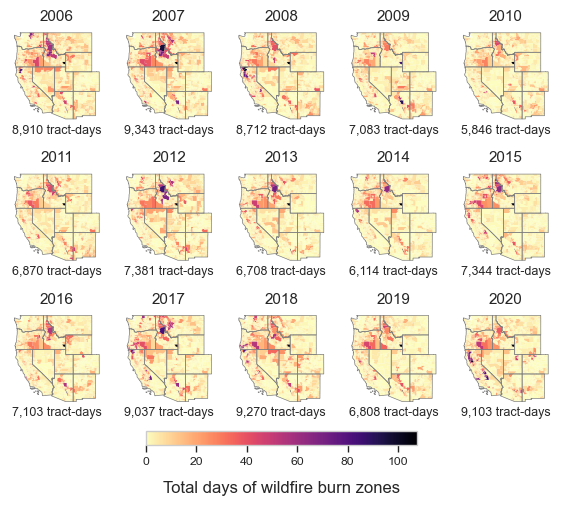

<Figure size 640x480 with 0 Axes>

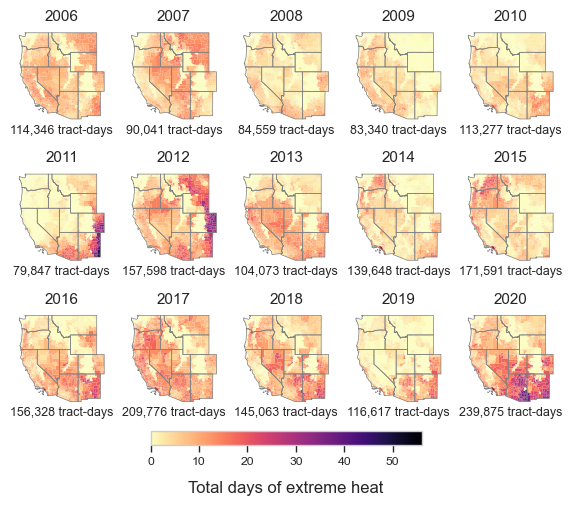

<Figure size 640x480 with 0 Axes>

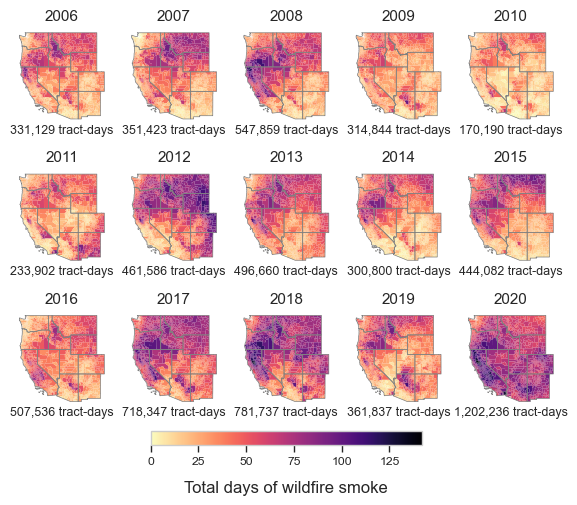

<Figure size 640x480 with 0 Axes>

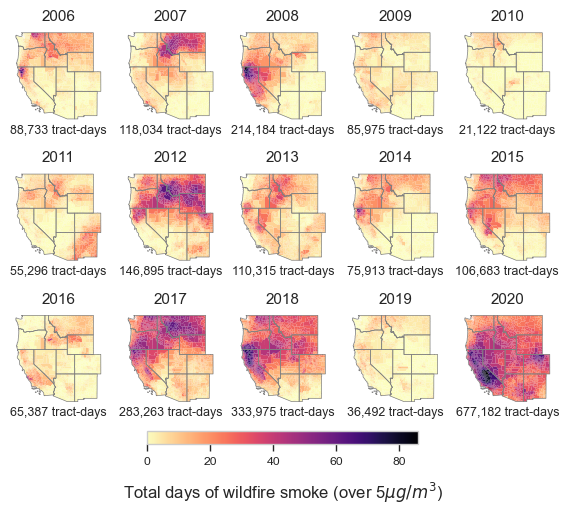

<Figure size 640x480 with 0 Axes>

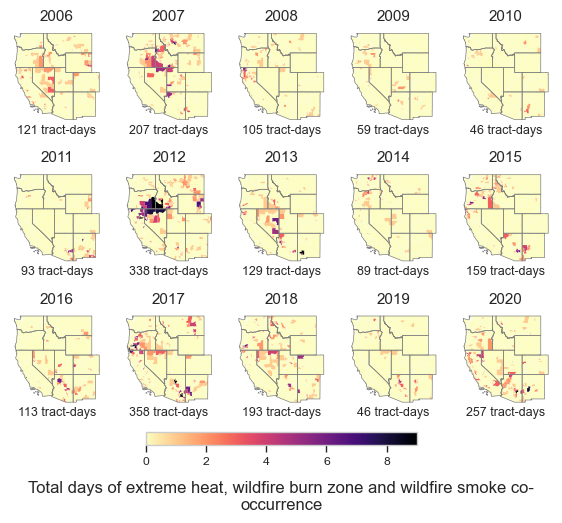

<Figure size 640x480 with 0 Axes>

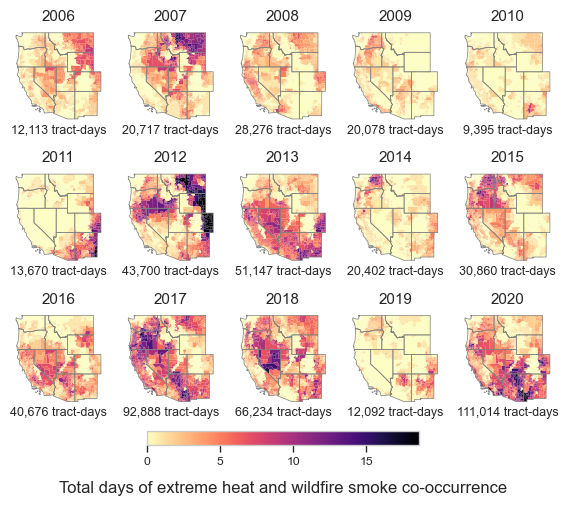

<Figure size 640x480 with 0 Axes>

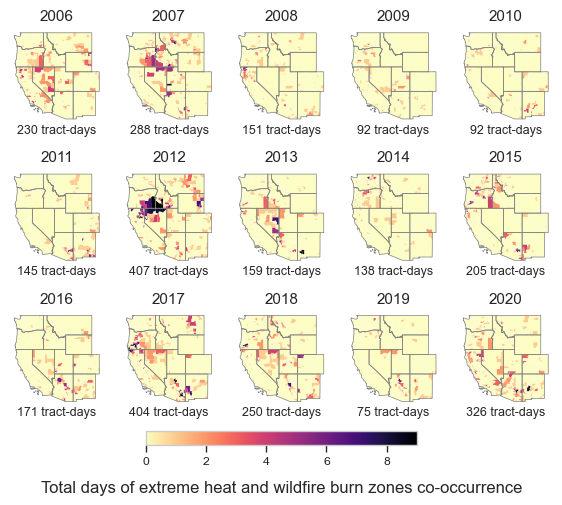

<Figure size 640x480 with 0 Axes>

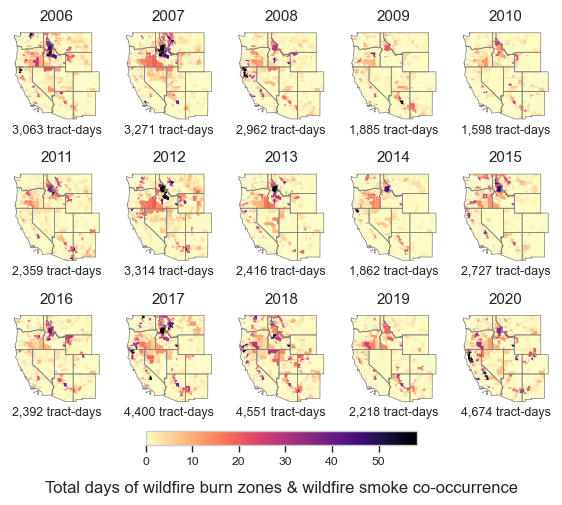

<Figure size 640x480 with 0 Axes>

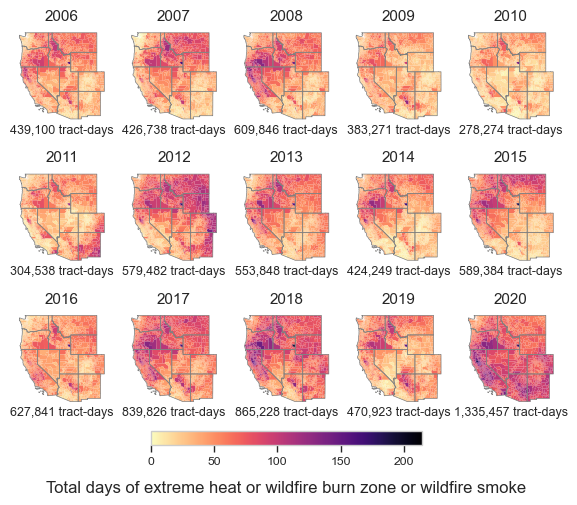

<Figure size 640x480 with 0 Axes>

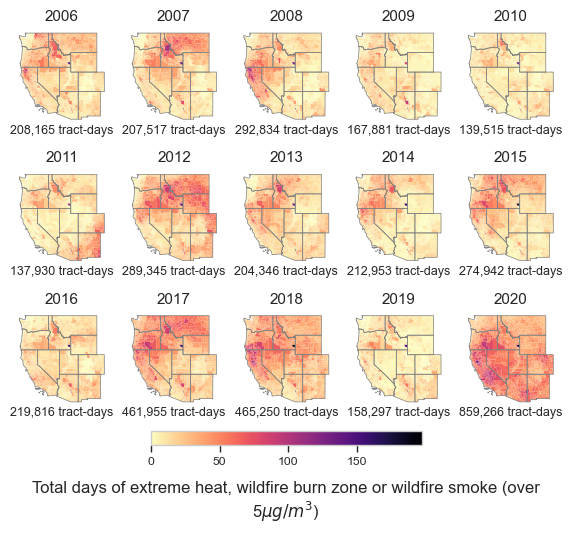

<Figure size 640x480 with 0 Axes>

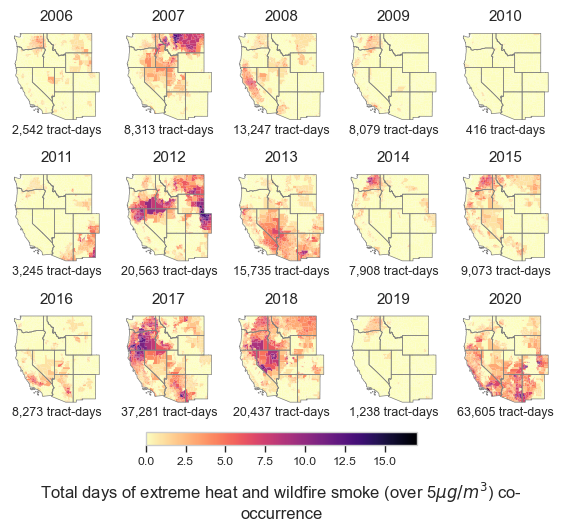

<Figure size 640x480 with 0 Axes>

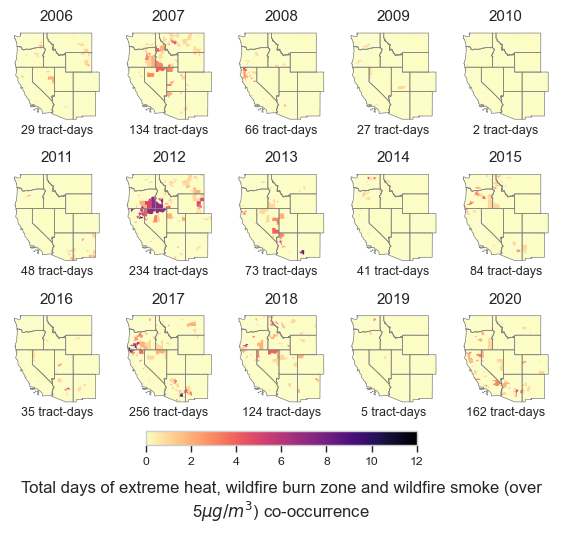

<Figure size 640x480 with 0 Axes>

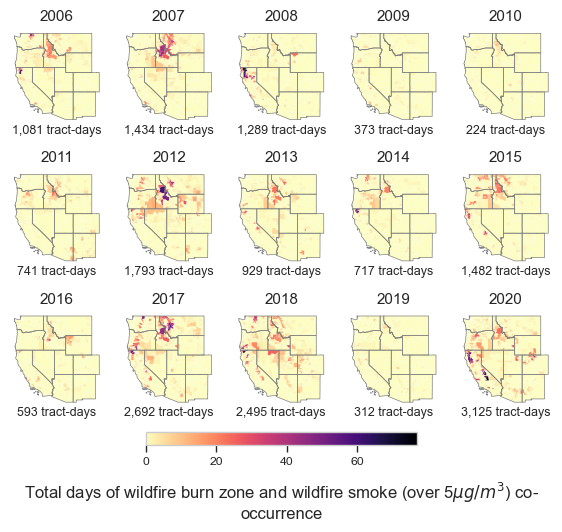

In [57]:
temp = []
for exposure in keys:
    # if not "mu" in hsdict[exposure]["title_map"]:
    #     continue
    plt.clf()  # clear figure
    fig, axs = plt.subplots(3, 5, figsize=(7, 6.5))
    axs = axs.flatten()  # Flatten the array of Axes objects into a single dimension

    # Creating a common colorbar
    vmin = df_main[exposure].min()
    vmax = df_main[exposure].max()
    cmap = "magma_r"
    if exposure in ["wfday", "hs", "hw", "ws", "hws"]:
        # rescale color for aestetics
        vmax = vmax*0.6

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])

    for i, year in enumerate(yrs):
        data = df_main[df_main["year"] == year]  # Filter data for the specific year
        exposure_days = data[exposure].sum()
    
        ax = axs[i]
        data.plot(
            column=exposure,
            ax=ax,
            cmap=cmap,
            vmin=vmin,
            vmax=vmax,
            legend=False,
            linewidth=0,
        )
        gdf.boundary.plot(ax=ax, linewidth=.5, color="gray")
        ax.text(
            0.5,
            -0.1,
            f"{exposure_days:,.0f} tract-days",
            ha="center",
            fontsize=9,
            transform=ax.transAxes,
        )
        ax.set_title(f"{year}", fontsize=11)
        ax.set_axis_off()

    
    cbar = fig.colorbar(
        sm, ax=axs.ravel().tolist(), orientation="horizontal", pad=0.05, shrink=0.5
    )
    wrapped_title = textwrap.fill(hsdict[exposure]["title_map"], 75)
    cbar.set_label(wrapped_title, rotation=0, labelpad=10, fontsize=12)
    
    #
    #fig.suptitle(wrapped_title, fontsize=14, fontweight="bold", y=0.95)
    
    # cbar.set_label(hsdict[exposure]["title_map"], rotation=270, labelpad=20)

    #plt.tight_layout()
    #plt.savefig("figures/sum_" + hsdict[exposure]["title"] + "_per_year_1204.png", dpi=300, bbox_inches="tight")
    plt.savefig(f'figures/pdf/fig2_{hsdict[exposure]["title"]}.pdf', format='pdf', dpi=350)
    plt.show()